regression stats for each model:
               model       r^2         p-val     slope  intercept  \
0  Horsepower to MPG  0.605948  7.031989e-81 -0.157845  39.935861   
1        Year to MPG  0.337028  1.075794e-36  1.230035 -70.011674   

   predicted mpg  
0      20.205269  
1    2370.378685  


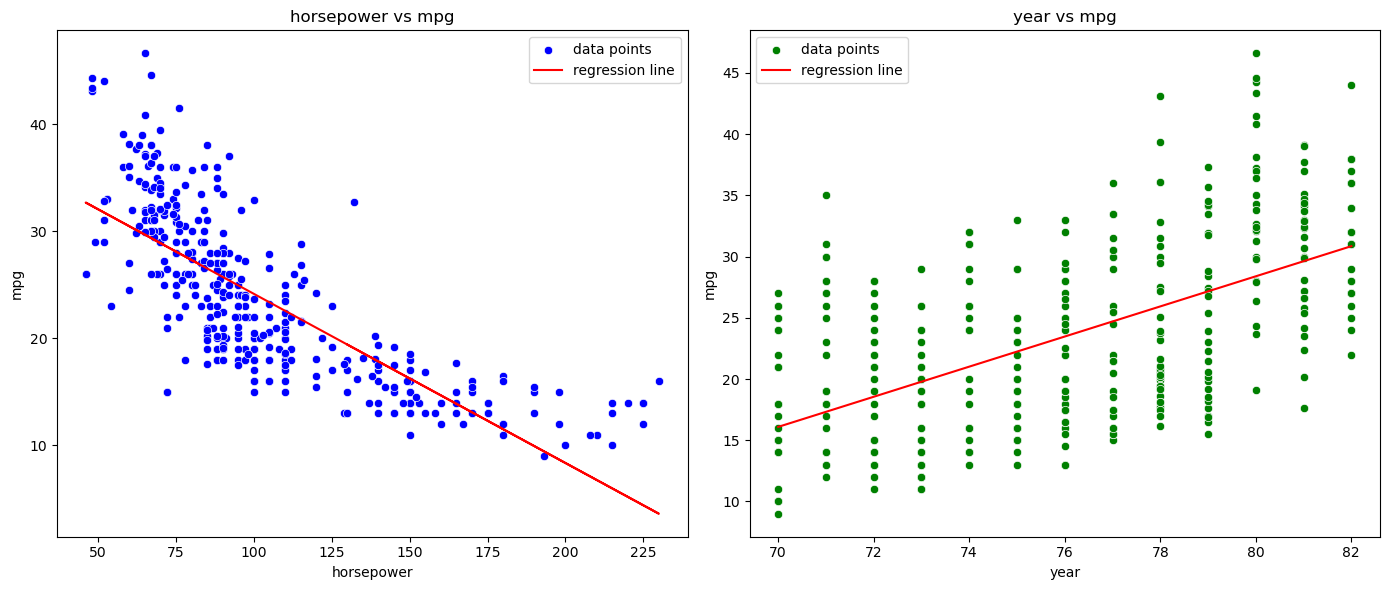


Summary of stats and explained variance:

Model: Horsepower to MPG
-  this model is significant.
 - it explains 60.59% of the variance in mpg.

Model: Year to MPG
-  this model is significant.
 - it explains 33.70% of the variance in mpg.


/nEnter horsepower for MPG prediction:  100


Predicted MPG for 100.0 horsepower: 24.15



Enter year for mpg prediction:  1950


predicted MPG for a car built in 1950: 2328.56


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

#first to load the data
file_path = 'AutoMPGdata.csv'
auto_mpg_data = pd.read_csv(file_path)

#now select the specific columns and remove the rows with missing values in the columns
auto_mpg_data = auto_mpg_data[['MPG', 'Horsepower', 'Year']].dropna()

#now create dictionary to put the results from the regression models
regression_stats = {
    "model": ["Horsepower to MPG", "Year to MPG"],
    "r^2": [], 
    "p-val": [],
    "slope": [],
    "intercept":[], 
    "predicted mpg": []
}

#now make the feature and target variables for first model
horsepower_values = auto_mpg_data[['Horsepower']].values
mpg_values = auto_mpg_data['MPG'].values

#now make the linear regression model
horsepower_mpg_model = LinearRegression().fit(horsepower_values, mpg_values)

#now use scipy to calculate
slope_hp, intercept_hp, r_value_hp, p_value_hp, std_err_hp = stats.linregress(auto_mpg_data['Horsepower'], auto_mpg_data['MPG'])

#predict the car with 125hp
mpg_prediction_hp_125 = horsepower_mpg_model.predict([[125]])

#put results from model 1 in dictionary
regression_stats["r^2"].append(r2_score(mpg_values, horsepower_mpg_model.predict(horsepower_values)))
regression_stats["p-val"].append(p_value_hp)
regression_stats["slope"].append(slope_hp)
regression_stats["intercept"].append(intercept_hp)
regression_stats["predicted mpg"].append(mpg_prediction_hp_125[0])

#now for model 2
#make the feature and target variables 
year_values = auto_mpg_data[['Year']].values

#create model
year_mpg_model = LinearRegression().fit(year_values, mpg_values)

#calculate 
slope_year, intercept_year, r_value_year, p_value_year, std_err_year = stats.linregress(auto_mpg_data['Year'], auto_mpg_data['MPG'])

#make prediction for car 1984
mpg_prediction_year_1984 = year_mpg_model.predict([[1984]])

#put results from model2 in dictionary
regression_stats["r^2"].append(r2_score(mpg_values, year_mpg_model.predict(year_values)))
regression_stats["p-val"].append(p_value_year)
regression_stats["slope"].append(slope_year)
regression_stats["intercept"].append(intercept_year)
regression_stats["predicted mpg"].append(mpg_prediction_year_1984[0])

#now convert stats 
regression_results_df = pd.DataFrame(regression_stats)
print("regression stats for each model:")
print(regression_results_df)

#now to plot
plt.figure(figsize = (14,6))

#model1 plot
plt.subplot(1,2,1)
sns.scatterplot(x=auto_mpg_data['Horsepower'], y=auto_mpg_data['MPG'], color="blue", label='data points')
plt.plot(auto_mpg_data['Horsepower'], horsepower_mpg_model.predict(horsepower_values), color="red", label="regression line")
plt.xlabel("horsepower")
plt.ylabel("mpg")
plt.title("horsepower vs mpg")
plt.legend()

#model2 plot
plt.subplot(1,2,2)
sns.scatterplot(x=auto_mpg_data['Year'], y=auto_mpg_data['MPG'], color="green", label='data points')
plt.plot(auto_mpg_data['Year'], year_mpg_model.predict(year_values), color="red", label="regression line")
plt.xlabel("year")
plt.ylabel("mpg")
plt.title("year vs mpg")
plt.legend()

#show both plot
plt.tight_layout()
plt.show()

#explain stats
print("\nSummary of stats and explained variance:")
for i, model in enumerate(regression_stats['model']):
    significance = 'significant' if regression_stats["p-val"][i] < 0.05 else 'not significant'
    explained_variance = regression_stats["r^2"][i] * 100
    print(f"\nModel: {model}")
    print(f"-  this model is {significance}.")
    print(f" - it explains {explained_variance:.2f}% of the variance in mpg.")

#predictions
#user to enter horsepower
input_horsepower = float(input("/nEnter horsepower for MPG prediction: "))
predicted_mpg_hp = horsepower_mpg_model.predict([[input_horsepower]])
print(f"Predicted MPG for {input_horsepower} horsepower: {predicted_mpg_hp[0]:.2f}")

#user to enter year 
input_year = int(input("\nEnter year for mpg prediction: "))
predicted_mpg_year = year_mpg_model.predict([[input_year]])
print(f"predicted MPG for a car built in {input_year}: {predicted_mpg_year[0]:.2f}")
                                            
